# **Hypothesis testing**

## Business goals: promotion response

* Which segments are more likely to respond to promotional events (i.e., use promo codes or discounts)?

* What customer attributes correlate with higher spending during promotions?




# **Core statistical concepts in data analysis**

Use of LMS and ChatGPT to provide below definitions: 

* Mean is the arithmetic average of a dataset, calculated by summing all values and dividing by the number of observations.

* Median is the middle value of an ordered dataset. Particularly good at identifying skewed data or outliers.

* Standard deviation measures the spread of data points from the mean.

* Hypothesis testing is a statistical method used to evaluate assumptions (hypotheses) about a population using sample data. It involves calculating the p-value to determine if observed results are statistically significant or could have occurred by chance.

* Basic probability provides a framework for quantifying the likelihood of outcomes and managing uncertainty in data analysis.

Together, these concepts are essential tools for extracting insights, identifying patterns and drawing reliable conclusions that support informed, data-driven decisions.


* Import Pandas and Numpy libraries.

In [2]:
import pandas as pd
import numpy as np

* Read csv file and convert into a DataFrame using function 'pd.read_csv()'.

In [3]:
import pandas as pd
df_cleaned = pd.read_csv('../jupyter_notebooks/final/cleaned_shopping_trends_and_customer_behaviour_dataset.csv') 
df_cleaned

,age,age_group,gender,item_purchased,category,purchase_amount_(usd),location,colour,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases
0,55,Pre-Retirement,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Bi-Weekly
1,19,Gen Z,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Bi-Weekly
2,50,Gen X Late,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Gen Z,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Gen X Late,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Gen X Early,Female,Hoodie,Clothing,28,Virginia,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Gen X Late,Female,Backpack,Accessories,49,Iowa,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Gen X Late,Female,Belt,Accessories,33,New Jersey,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,44,Gen X Early,Female,Shoes,Footwear,77,Minnesota,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


# **Statistical tests**

* ChatGPT was used to generate below hypothesis and the code to run the statistical calculation.

**H1: Younger customer groups use promo codes more often than older groups.**

* H₀ (**Null hypothesis**):
There is no difference in promo code usage between younger and older customer groups.

* H₁ (**Alternative hypothesis**):
Younger customer groups use promo codes more often than older groups.


**H2: Female customers are more likely to use discounts than male customers.**

* H₀ (**Null hypothesis**):
There is no difference in discount usage between female and male customers.

* H₁ (**Alternative hypothesis**):
Female customers are more likely to use discounts than male customers.

**H3: Customers who use discounts tend to spend more per purchase.**

* H₀ (**Null hypothesis**):
Customers who use discounts and those who don’t have the same average purchase amount.

* H₁ (**Alternative hypothesis**):
Customers who use discounts have a higher average purchase amount per transaction.

**H4: Season affects promotion response (e.g., more promo code use during Winter sales).**

* H₀ (**Null hypothesis**):
Promotion response is the same across all seasons — season has no effect.

* H₁ (**Alternative hypothesis**):
Promotion response varies by season; season does affect promo code use.


In [1]:
# import scipy library to initiate statistical analysis and hypothesis testing
import scipy.stats as stats

**1.  H1: Younger customer groups use promo codes more often than older groups.**

* H₀ (**Null hypothesis**):
There is no difference in promo code usage between younger and older customer groups.

* H₁ (**Alternative hypothesis**):
Younger customer groups use promo codes more often than older groups.

In [ ]:
# Clean and preprocess columns

# .str.strip() removes any leading or trailing spaces (e.g., " Yes " becomes "Yes").
# .str.lower() converts the entire string to lowercase (e.g., "Yes" becomes "yes").

df_cleaned['promo_code_used'] = df_cleaned['promo_code_used'].str.strip().str.lower()

# pd.crosstab() creates a contingency table that shows the frequency counts of 
# promo code usage (yes/no) across different age groups.
# stats.chi2_contingency() performs the Chi-squared test of independence on the
# contingency table created above.
# The two underscores _, _ represent expected frequencies and degrees of freedom,
# which are not needed here but are returned by default.
h1_table = pd.crosstab(df_cleaned['age_group'], df_cleaned['promo_code_used'])
h1_chi2, h1_p, _, _ = stats.chi2_contingency(h1_table)

# Display results
print("H1 - Age Group vs Promo Code Usage:")
print("Chi² Stat:", h1_chi2)
print("p-value:", h1_p)
print("Significant:", h1_p < 0.05)
print("\n")
# print("\n") creates a blank line in the output.

H1 - Age Group vs Promo Code Usage:
Chi² Stat: 1.0887155051993171
p-value: 0.9550976431155631
Significant: False




**Outcome**: non statistically significant. Accept the null hypothesis and reject the alternative hypothesis.

**Conclusion:**

* There is no statistically significant association between age group and promo code usage. The p-value (0.955) is much greater than the typical threshold of 0.05, suggesting that any observed differences in promo code usage across age groups are likely due to chance.

* This means the data does not support the hypothesis that younger customer groups use promo codes more frequently than older ones. 

**2. H2: Female customers are more likely to use discounts than male customers.**

* H₀ (**Null hypothesis**):
There is no difference in discount usage between female and male customers.

* H₁ (**Alternative hypothesis**):
Female customers are more likely to use discounts than male customers.

In [ ]:
# Clean and preprocess columns

# .str.strip() removes any leading or trailing spaces (e.g., " Yes " becomes "Yes").
# .str.lower() converts the entire string to lowercase (e.g., "Yes" becomes "yes").

df_cleaned['discount_applied'] = df_cleaned['discount_applied'].str.strip().str.lower()

# pd.crosstab() creates a contingency table that shows the frequency counts of 
# discount usage (yes/no) by gender.
# stats.chi2_contingency() performs the Chi-squared test of independence on the
# contingency table created above.
# The two underscores _, _ represent expected frequencies and degrees of freedom,
# which are not needed here but are returned by default.
h2_table = pd.crosstab(df_cleaned['gender'], df_cleaned['discount_applied'])
h2_chi2, h2_p, _, _ = stats.chi2_contingency(h2_table)

# Display results
print("H2 - Gender vs Discount Usage:")
print("Chi² Stat:", h2_chi2)
print("p-value:", h2_p)
print("Significant:", h2_p < 0.05)
print("\n")
# print("\n") creates a blank line in the output.

H2 - Gender vs Discount Usage:
Chi² Stat: 1381.9413463923058
p-value: 1.7645380691667684e-302
Significant: True




**Outcome**: statistically significant. Reject the null hypothesis and accept the alternative hypothesis.

**Conclusion:**

* The result is statistically significant, with a very low p-value, indicating a strong association between gender and discount usage. However, the pattern contradicts the hypothesis: while the hypothesis stated that female customers are more likely to use discounts, the data shows that male customers are overwhelmingly more likely to apply discounts (1,677 males vs. 0 females).

* This suggests either a data issue (e.g., missing or misclassified discount records for female customers) or a genuine trend in the dataset that should be further investigated. 

**3. H3: Customers who use discounts tend to spend more per purchase.**

* H₀ (**Null hypothesis**):
Customers who use discounts and those who don’t have the same average purchase amount.

* H₁ (**Alternative hypothesis**):
Customers who use discounts have a higher average purchase amount per transaction.

In [ ]:
# Clean and preprocess columns

# .str.strip() removes any leading or trailing spaces.
# .str.capitalize() ensures the first letter is uppercase and the rest are lowercase (e.g., "male" becomes "Male").

df_cleaned['gender'] = df_cleaned['gender'].str.strip().str.capitalize()

# group1: filters the dataset on customers who used a discount and extracts the corresponding purchase amount. It then stores the result in variable group1.
# group2: filters the dataset on customers who did not use a discount and extracts the corresponding purchase amount. It then stores the result in variable group2.
# performs an independent two-sample t-test using scipy.stats.ttest_ind() 
# to compare the average purchase amount between the two groups.
# equal_var=False tells Python to use Welch’s t-test, which is better when the two groups might have unequal variances or unequal sample sizes.
# h3_t: the t-statistic
# h3_p: the p-value
group1 = df_cleaned[df_cleaned['discount_applied'] == 'yes']['purchase_amount_(usd)']
group2 = df_cleaned[df_cleaned['discount_applied'] == 'no']['purchase_amount_(usd)']
h3_t, h3_p = stats.ttest_ind(group1, group2, equal_var=False)

# Display results
print("H3 - Discount vs Spend:")
print("p-value:", h3_p)
print("t-Statistic:", h3_t)
print("Significant:", h3_p < 0.05)
print("\n")
# print("\n") creates a blank line in the output.

H3 - Discount vs Spend:
p-value: 0.26611244488939256
t-Statistic: -1.1122316185807992
Significant: False




**Outcome**: non statistically significant. Accept the null hypothesis and reject the alternative hypothesis.

* Mean Purchase (Discount = Yes): $59.28
* Mean Purchase (Discount = No): $60.13

**Conclusion:**

* The difference in average spending between customers who used discounts versus those who did not is not statistically significant (p = 0.266 > 0.05).
This means the data does not support the hypothesis that customers who use discounts tend to spend more per purchase. 


**4. H4: Season affects promotion response (e.g., more promo code use during Winter sales).**

* H₀ (**Null hypothesis**):
Promotion response is the same across all seasons — season has no effect.

* H₁ (**Alternative hypothesis**):
Promotion response varies by season; season does affect promo code use.

In [4]:
# Clean and preprocess columns

# .str.strip() removes any leading or trailing spaces.

df_cleaned['age_group'] = df_cleaned['age_group'].str.strip()

# pd.crosstab() creates a contingency table that shows the frequency counts of 
# promo code used (yes/no) by season.
# stats.chi2_contingency() performs the Chi-squared test of independence on the
# contingency table created above.
# The two underscores _, _ represent expected frequencies and degrees of freedom,
# which are not needed here but are returned by default.
h4_table = pd.crosstab(df_cleaned['season'], df_cleaned['promo_code_used'])
h4_chi2, h4_p, _, _ = stats.chi2_contingency(h4_table)

# Display results
print("H4 - Season vs Promo Code Usage:")
print("Chi² Stat:", h4_chi2)
print("p-value:", h4_p)
print("Significant:", h4_p < 0.05)
print("\n")
# print("\n") creates a blank line in the output.

H4 - Season vs Promo Code Usage:
Chi² Stat: 3.1687022338896487
p-value: 0.3663388240993125
Significant: False




**Outcome**: non statistically significant. Accept the null hypothesis and reject the alternative hypothesis.

**Conclusion:**

* The data does not provide statistically significant evidence that promo code usage varies by season. The p-value (0.366) is greater than 0.05, meaning any observed differences in promotional response across seasons are likely due to random variation rather than a meaningful pattern. Therefore, the alternative hypothesis is not supported by the data.

**Personal reflexion**: had this been in a real working environment, I would have questioned the integrity of the data. Across all seasons, count of promo code used (No) > count of promo code used (Yes). I was expecting the opposite in purchasing behaviour. Usually, promotional events drive an increase in sales.  

* count of promo code used (No) = 2223
* count of promo code used (Yes) = 1677

# **Visualisation for each hypothesis**

* Import of Python data visualisation libraries

In [5]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
# Sets the default Seaborn plot style.
# "whitegrid" adds a clean white background with gridlines, which improves 
# readability for charts that display distributions or comparisons.

In [7]:
import plotly.express as px

* Python code for visualisation was generated with the assistance of Chatgpt.
* Chatgpt was also used to troubleshoot the errors I received initially on some of the graphs.

**1.  H1: Younger customer groups use promo codes more often than older groups.**

* Initially, when I tried to create my matplotlib graph, encountered an issue where I was alerted that matplotlib was not installed. Since I still encountered the issue despite installing it in the terminal, one of the SME Data coaches suggested to install by using notebook cell. Since the graph was still not generating, pushed through the changes to my Github account for the technical team to have another look. While this was happening, realised that I had not restarted the Kernel (an oversight on my part). After restarting the Kernel, graph generated as expected. 

In [50]:
!pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Figure size 1000x600 with 0 Axes>

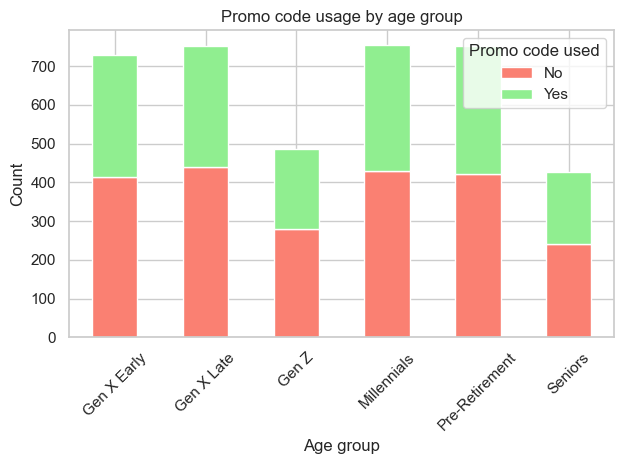

In [8]:
# Create a crosstab of promo code usage by age group
age_promo_counts = pd.crosstab(df_cleaned['age_group'], df_cleaned['promo_code_used'])

# Plot using matplotlib
plt.figure(figsize=(10, 6))
age_promo_counts.plot(kind='bar', stacked=True, color=['salmon', 'lightgreen'])

plt.title("Promo code usage by age group")
plt.xlabel("Age group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Promo code used")
plt.tight_layout()
plt.show()

* Promo code usage by age group (H1) shows if younger groups (e.g., Gen Z, Millennials) use more promo codes than other groups. Gen Z and Seniors are the 2 groups that used less promo codes in relation to the other groups.

**2. H2: Discount usage by gender**

In [20]:
%pip install nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


* When running the code initially, faced an error. To resolve error: 'ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed', needed to run '%pip install nbformat>=4.2.0' as a code first. Plotly graph now displaying correctly. Breakfix advised by a fellow student (Jane Weightman).

In [9]:
h2_plot_data = df_cleaned.groupby(['gender', 'discount_applied']).size().reset_index(name='count')

# Create Plotly bar chart
fig = px.bar(
    h2_plot_data,
    x="gender",
    y="count",
    color="discount_applied",
    barmode="group",
    title="Discount usage by gender (interactive)",
    labels={"discount_applied": "Discount Applied", "count": "Number of Customers"}
)

# Show the figure
fig.show()

c:\Users\User\OneDrive\Documents\VS Code Projects\dev\Shopping-Trends\.venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


* Discount usage by gender (H2) highlights gender differences in using discounts. Males were the ones who made the most use of discounts compared to women who did not use discounts at all.

3. **H3: Purchase amount by discount usage**

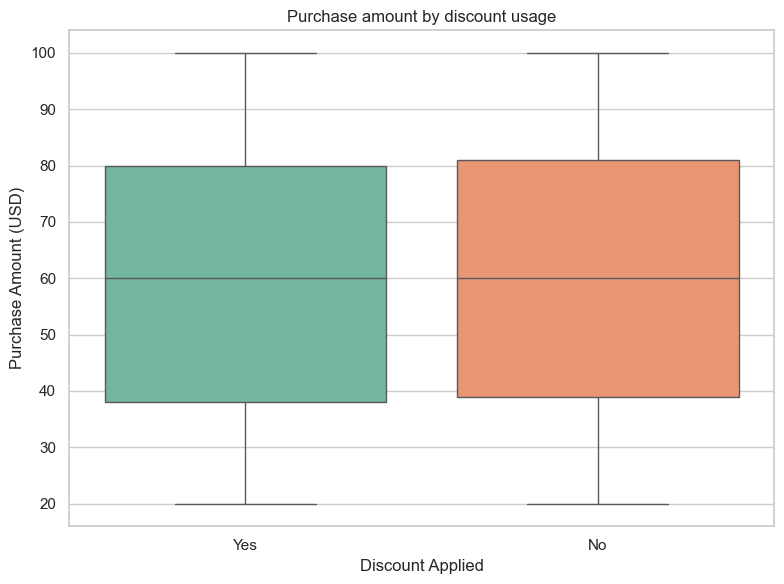

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned, x='discount_applied', y='purchase_amount_(usd)', hue='discount_applied', palette='Set2', legend=False)
plt.title("Purchase amount by discount usage")
plt.xlabel("Discount Applied")
plt.ylabel("Purchase Amount (USD)")
plt.tight_layout()
plt.show()

* Purchase amount by discount usage (H3) uses a boxplot to compare spending behaviour with and without discounts.

* The boxplot suggests that customers who used discounts spent less per purchase than the ones who did not. I would take this outcome as a pintch of salt since our statistical test above produced a non statistically significant result (customers who use discounts tend to spend more per pruchase). So, we can't confidently say if using discounts leads or not to higher spending based on this data. As stated earlier, in a working environment, I would question the integrity of the data with the business.

**4. H4: Promo code usage by season**

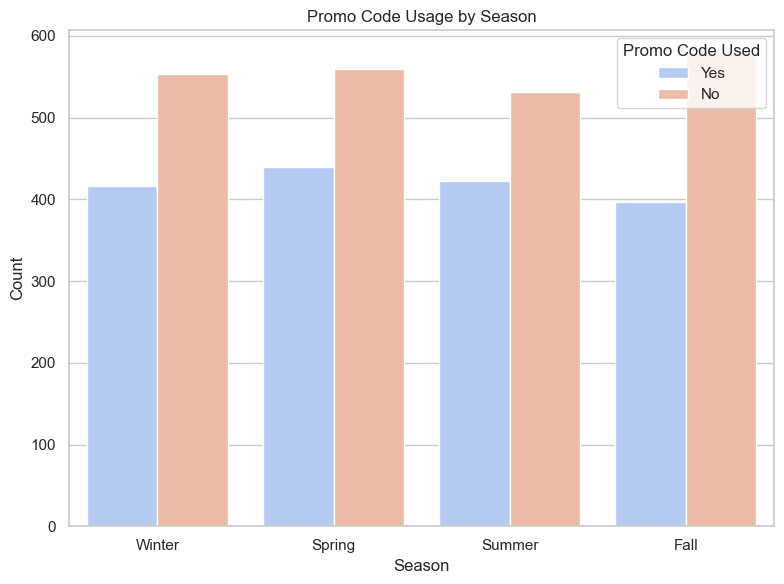

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='season', hue='promo_code_used', palette='coolwarm')
plt.title("Promo Code Usage by Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.legend(title="Promo Code Used")
plt.tight_layout()
plt.show()

* Promo code usage by season (H4) helps identify seasonal patterns in promo code usage. As stated earlier, across all seasons, promotional events do not seem to have an effect on customer purchase behaviour. Based on the graph, promotional codes used in descending order (highest to lowest): Spring, Summer, Winter, Fall.